In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from pathlib import Path
from datetime import datetime
import itertools

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyprojroot import here

from knapsack import KnapsackGA
from knapsack.items import items

# Knapsack - Brute Force

In [45]:
max_weight = 20
# past 24 takes a long time :)
max_n = 24
history = []

for n in range(1, max_n + 1):
    n_items = items[:n]

    best_fitness = 0
    best_solution = None

    start_time = datetime.now()

    n_combinations_checked = 0
    for combination in map(list, itertools.product((0, 1), repeat=n)):
        n_combinations_checked += 1
        
        value = sum(item.value for item, selected in zip(n_items, combination) if selected)
        weight = sum(item.weight for item, selected in zip(n_items, combination) if selected)

        if weight > max_weight:
            value = 0

        # update
        if value > best_fitness:
            best_solution = combination
            best_fitness = value

    end_time = datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    history.append(
        (n, n_combinations_checked, elapsed_time, best_fitness)
    )
    print(n, n_combinations_checked, elapsed_time)

1 2 1.7e-05
2 4 1.5e-05
3 8 1.6e-05
4 16 3.1e-05
5 32 6.1e-05
6 64 0.000123
7 128 0.000248
8 256 0.000523
9 512 0.00109
10 1024 0.003369
11 2048 0.004684
12 4096 0.012168
13 8192 0.023318
14 16384 0.044563
15 32768 0.097044
16 65536 0.198384
17 131072 0.403962
18 262144 0.904958
19 524288 1.901017
20 1048576 4.11047
21 2097152 7.45692
22 4194304 15.41181
23 8388608 31.382631
24 16777216 66.503822


In [46]:
data = pd.DataFrame(history, columns=["n", "combinations_checked", "time (s)", "best_fitness"])

[Text(0.5, 1.0, 'Brute-force Time Complexity for Knapsack Problem'),
 Text(0.5, 0, 'N items'),
 Text(0, 0.5, 'Time (s)')]

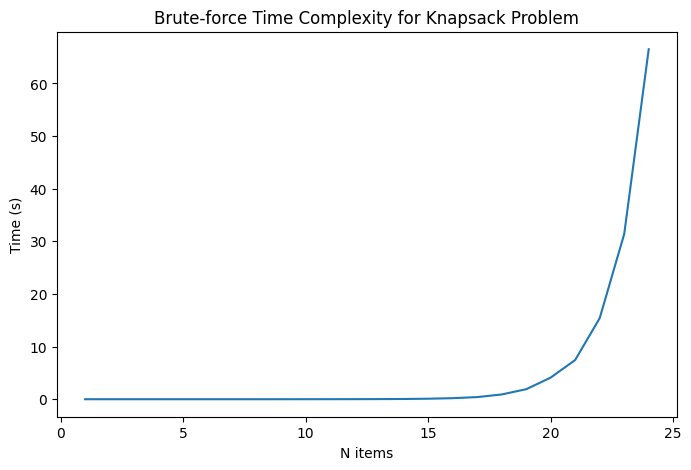

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data, x="n", y="time (s)", ax=ax,)

ax.set(title="Brute-force Time Complexity for Knapsack Problem", xlabel="N items", ylabel="Time (s)")